# Solving the n-Queens Problem using Local Search

Student Name: Jadon Swearingen

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: JS

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


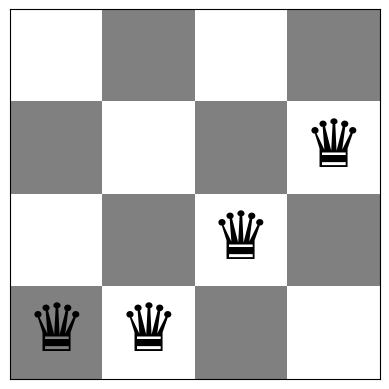

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [162]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


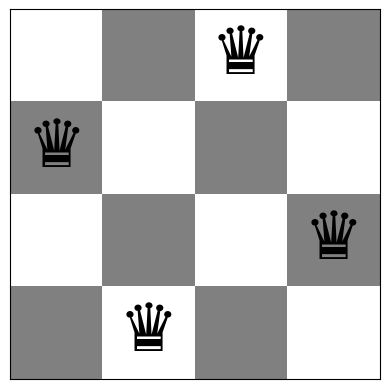

In [163]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [164]:
# Code and description go here
def Stochastic():
    return False
def simulatedAnnealing():
    return False
def SteepestAscent(board):
    num = len(board)
    bestConflicts = conflicts(board)
    bestBoard = board.copy()
    for i in range(num): # i is the col number (which queen are we moving)
        for j in range(num): #j is the row number (where should we move the new queen)
            if j != board[i]: #skip the option of don't move the queen
                newBoard = board.copy() #copy the new board to try to move a single queen to a single new row(i)
                newBoard[i] = j #move the queen to new row (i)
                newConflicts = conflicts(newBoard)
                #if the amount of new conflicts is less than the current best replace the current best
                if(newConflicts < bestConflicts):
                    bestConflicts = newConflicts
                    bestBoard = newBoard
    return bestBoard, bestConflicts

def solve(board,solver, max_tries = 100,verbose=False):
    if(len(board) **2 > max_tries):
        max_tries = len(board) * 4
    if(solver is Stochastic or solver is SteepestAscent or solver is simulatedAnnealing):
        max_tries = 1
    triesWithNoImprovement = 0
    if(verbose):
        # show_board(board)
        print(board)
    while triesWithNoImprovement < max_tries:
        newBoard, newConflicts = solver(board)
        if(newConflicts < conflicts(board)):
            triesWithNoImprovement = 0
            board = newBoard
            if(verbose):
                # show_board(board)
                print(board)
        else:
            triesWithNoImprovement += 1
    return board
board = random_board(4)
solve(board,SteepestAscent,verbose=True)

[0 0 0 1]
[0 0 3 1]
[2 0 3 1]


array([2, 0, 3, 1])

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [165]:
import random
# Code and description go here
def Stochastic(board):
    num = len(board)
    currentConflicts = conflicts(board)
    betterBoards = []
    for i in range(num): # i is the col number (which queen are we moving)
        for j in range(num): #j is the row number (where should we move the new queen)
            if j != board[i]: #skip the option of don't move the queen
                newBoard = board.copy() #copy the new board to try to move a single queen to a single new row(i)
                newBoard[i] = j #move the queen to new row (i)
                newConflicts = conflicts(newBoard)
                #if the amount of new conflicts is less than the start, add to the list
                if(newConflicts < currentConflicts):
                    betterBoards.append(newBoard)
    #if no better moves return this board
    if len(betterBoards) == 0:
        return board, currentConflicts
    #randomly choose from all better moves
    newBoard = random.choice(betterBoards)
    return newBoard, conflicts(newBoard)
board = random_board(4)
solve(board,Stochastic,verbose=True)

[3 1 3 1]
[3 0 3 1]
[2 0 3 1]


array([2, 0, 3, 1])

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [166]:
# Code and description go here
def FirstChoiceStochastic(board):
    num = len(board)
    currentConflicts = conflicts(board)
    col = random.randint(0,num-1) #random queen
    row = random.randint(0,num-1) #random spot to move (row)
    if row != board[col]: #make sure queen is not in new row already
        newBoard = board.copy()
        newBoard[col] = row #move the queen
        newConflicts = conflicts(newBoard)
        if(newConflicts < currentConflicts): #if this move is better, return
            return newBoard, newConflicts
    return board, currentConflicts #if no improvement, return the current board

board = random_board(4)
solve(board,FirstChoiceStochastic,100,verbose=True)     


[2 2 3 2]
[2 2 0 2]
[3 2 0 2]
[3 3 0 2]
[1 3 0 2]


array([1, 3, 0, 2])

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [167]:
def solveRestarts(board,solver, maxTries = 100,verbose=False,maxRestarts = 100):
    if(len(board) **2 > maxTries):
        maxTries = len(board) **2
    if(solver is Stochastic or solver is SteepestAscent):
        maxTries = 1
    # if(verbose):
    #     show_board(board)

    best_board = board
    best_conflicts = conflicts(board)
    for _ in range(maxRestarts):
        insideBoard = random_board(len(board))  # start with a new random board
        triesWithNoImprovement = 0

        # insideBoard = board
        while triesWithNoImprovement < maxTries:
            newBoard, newConflicts = solver(insideBoard)
            if(newConflicts < conflicts(insideBoard)):
                triesWithNoImprovement = 0
                insideBoard = newBoard
                # if(verbose):
                    # show_board(insideBoard)
            else:
                triesWithNoImprovement += 1
        if conflicts(insideBoard) < best_conflicts:
            best_board = insideBoard
            best_conflicts = conflicts(insideBoard)
            # if(verbose):
            #     show_board(insideBoard)
        if best_conflicts == 0:
            break
    return best_board
board_size = 4
board = random_board(board_size)

print("Solving with Steepest Ascent Hill Climbing:")
best_board = solveRestarts(board, SteepestAscent, verbose=True)
print("Best board has", conflicts(best_board), "conflicts")

print("Solving with First Choice Stochastic Hill Climbing:")
best_board = solveRestarts(board, FirstChoiceStochastic, verbose=True)
print("Best board has", conflicts(best_board), "conflicts")

print("Solving with Stochastic Hill Climbing:")
best_board = solveRestarts(board, Stochastic, verbose=True)
print("Best board has", conflicts(best_board), "conflicts")

Solving with Steepest Ascent Hill Climbing:
Best board has 0 conflicts
Solving with First Choice Stochastic Hill Climbing:
Best board has 0 conflicts
Solving with Stochastic Hill Climbing:
Best board has 0 conflicts


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [168]:
# Code and description go here
import math
def simulatedAnnealing(board,verbose = False):
    num = len(board)
    best_board = board
    best_conflicts = conflicts(board)
    temperature = 1.0
    cooling_rate = 0.95

    while temperature > 0.01:
        newBoard = best_board.copy()
        col = random.randint(0,num-1) #random queen
        newBoard[col] = random.randint(0,num-1) #random spot to move (row)
        newConflicts = conflicts(newBoard)
        
        if(newConflicts < best_conflicts) or math.exp(-(newConflicts - best_conflicts) / temperature) > random.random():
            best_board = newBoard
            best_conflicts = newConflicts
        if(best_conflicts == 0):
            break
        temperature *= cooling_rate
    return best_board, best_conflicts
board_size = 4
board = random_board(board_size)
best_board, best_conflicts = simulatedAnnealing(board, verbose=True)

# Print the results
print("Best board:", best_board)
print("Number of conflicts:", best_conflicts)

Best board: [1 3 0 2]
Number of conflicts: 0


## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm             |   Board size |   Avg. Run time |   Avg. number of conflicts |   % of runs ending in optimal solution |
|:----------------------|-------------:|----------------:|---------------------------:|---------------------------------------:|
| SteepestAscent        |            4 |     0.000400059 |                       0.54 |                                     48 |
| Stochastic            |            4 |     0.000320044 |                       0.76 |                                     37 |
| FirstChoiceStochastic |            4 |     0.00232111  |                       0.93 |                                     27 |
| simulatedAnnealing    |            4 |     0.000479989 |                       0.03 |                                     97 |
| SteepestAscent        |            8 |     0.00273038  |                       1.15 |                                     17 |
| Stochastic            |            8 |     0.00372981  |                       1.33 |                                     16 |
| FirstChoiceStochastic |            8 |     0.00385735  |                       1.59 |                                      8 |
| simulatedAnnealing    |            8 |     0.00181937  |                       1    |                                     19 |
| SteepestAscent        |           12 |     0.0128619   |                       1.76 |                                      4 |
| Stochastic            |           12 |     0.0167047   |                       1.81 |                                      3 |
| FirstChoiceStochastic |           12 |     0.00364518  |                       3.13 |                                      0 |
| simulatedAnnealing    |           12 |     0.00330936  |                       1.9  |                                      2 |
| SteepestAscent        |           16 |     0.0282335   |                       2.12 |                                      0 |
| Stochastic            |           16 |     0.0477634   |                       2.02 |                                      6 |
| FirstChoiceStochastic |           16 |     0.00665725  |                       4.01 |                                      0 |
| simulatedAnnealing    |           16 |     0.0042726   |                       3.1  |                                      0 |
| SteepestAscent        |           20 |     0.105651    |                       2.24 |                                      3 |
| Stochastic            |           20 |     0.351781    |                       2.56 |                                      2 |
| FirstChoiceStochastic |           20 |     0.0388567   |                       4.81 |                                      0 |
| simulatedAnnealing    |           20 |     0.0190983   |                       4.22 |                                      0 |
| SteepestAscent        |           24 |     0.368276    |                       2.61 |                                      1 |
| Stochastic            |           24 |     0.239151    |                       2.7  |                                      1 |
| FirstChoiceStochastic |           24 |     0.0183516   |                       5.23 |                                      0 |
| simulatedAnnealing    |           24 |     0.00732916  |                       5.48 |                                      0 |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [169]:
# Code, results, charts and discussion go here
# Code and description go here
import time
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

def run(solver, boardSize, numRuns):
    totalRuntime = 0
    totalConflicts = 0
    numOptimalSolutions = 0
    for _ in range(numRuns):
        board = random_board(boardSize)
        
        startTime = time.time()
        finalBoard = solve(board,solver)
        endTime = time.time()
        runtime = endTime - startTime
        
        cs = conflicts(finalBoard)
        
        if cs == 0:
            numOptimalSolutions += 1
        totalRuntime+=runtime
        totalConflicts+= cs
    avgRuntime = totalRuntime / numRuns
    avgConflicts = totalConflicts / numRuns
    percentOptimalSolutions = (numOptimalSolutions / numRuns) * 100
    return avgRuntime, avgConflicts, percentOptimalSolutions

df = pd.DataFrame(columns=["Algorithm", "Board size", "Avg. Run time", "Avg. number of conflicts", "% of runs ending in optimal solution"])
for board_size in [4,8,12,16,20,24]:
    print(board_size)
    for solver in [SteepestAscent, Stochastic, FirstChoiceStochastic,simulatedAnnealing]:
        # results[(solver.__name__, board_size)] = run(solver, board_size, 100)
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 100)
        # print("next")
        # Append the results to the DataFrame
        new_df = pd.DataFrame({
            "Algorithm": [solver.__name__],
            "Board size": [board_size],
            "Avg. Run time": [avg_runtime],
            "Avg. number of conflicts": [avg_conflicts],
            "% of runs ending in optimal solution": [percent_optimal_solutions]
        })
        df = pd.concat([df,new_df],ignore_index=True)

print(df.to_markdown(index=False))

4
8


12
16
20
24
| Algorithm             |   Board size |   Avg. Run time |   Avg. number of conflicts |   % of runs ending in optimal solution |
|:----------------------|-------------:|----------------:|---------------------------:|---------------------------------------:|
| SteepestAscent        |            4 |     0.000400059 |                       0.54 |                                     48 |
| Stochastic            |            4 |     0.000320044 |                       0.76 |                                     37 |
| FirstChoiceStochastic |            4 |     0.00232111  |                       0.93 |                                     27 |
| simulatedAnnealing    |            4 |     0.000479989 |                       0.03 |                                     97 |
| SteepestAscent        |            8 |     0.00273038  |                       1.15 |                                     17 |
| Stochastic            |            8 |     0.00372981  |                       1.33

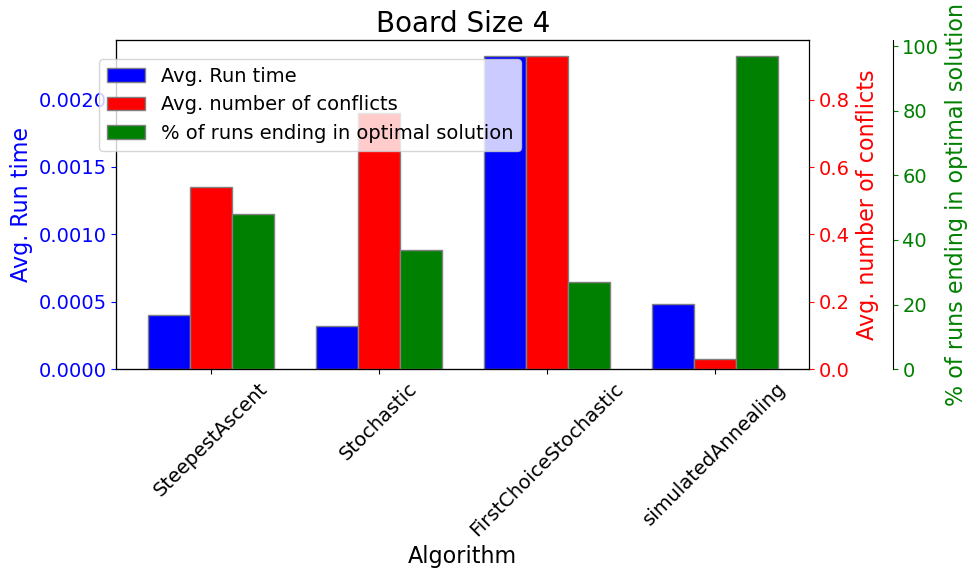

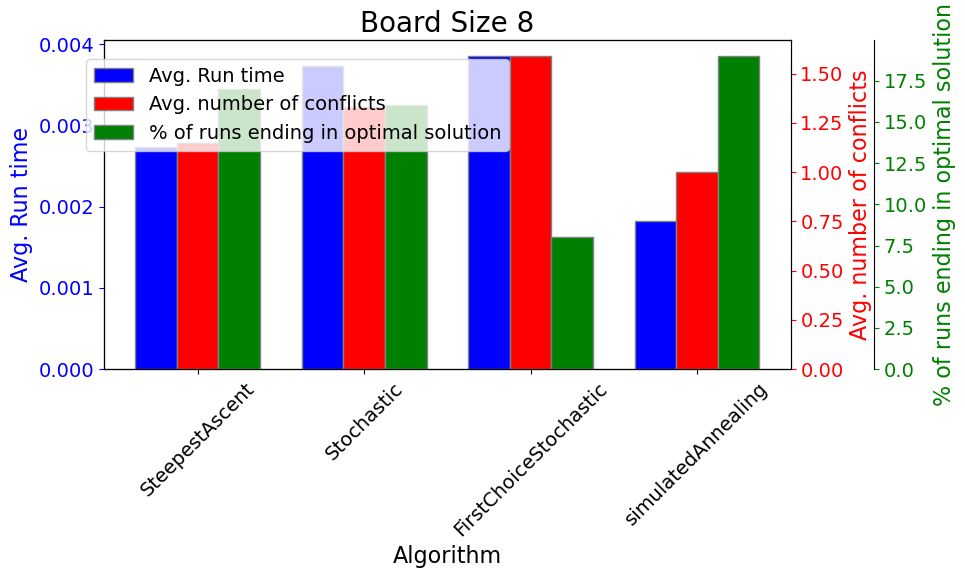

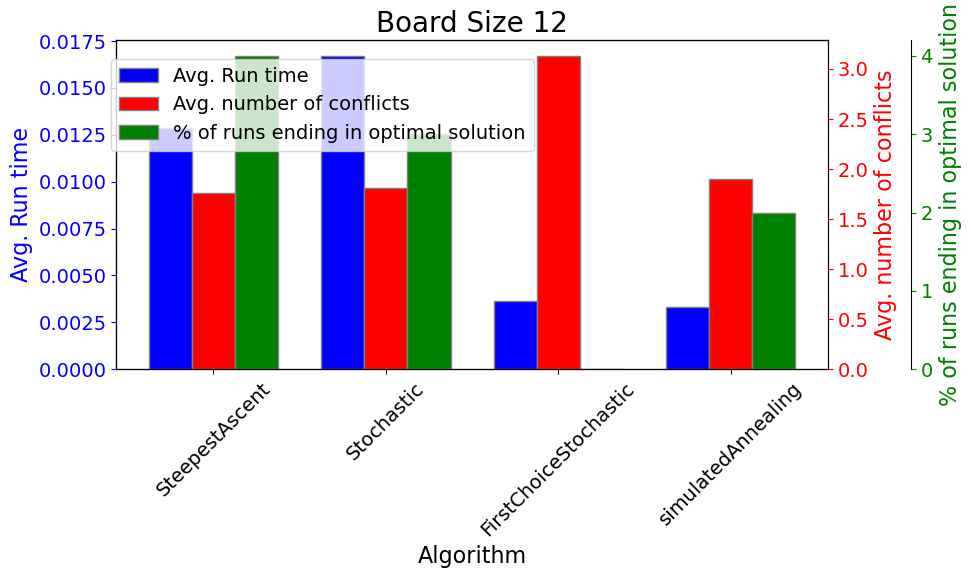

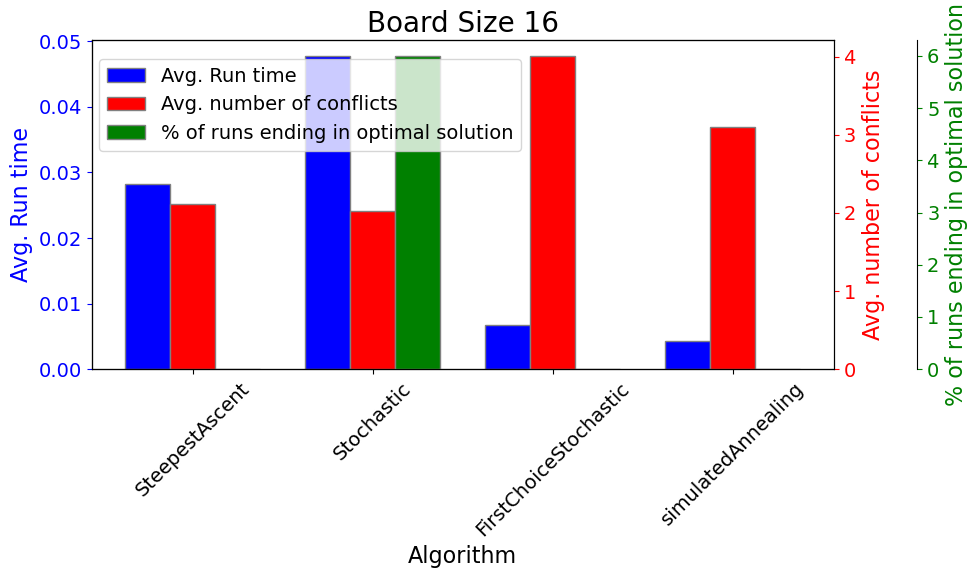

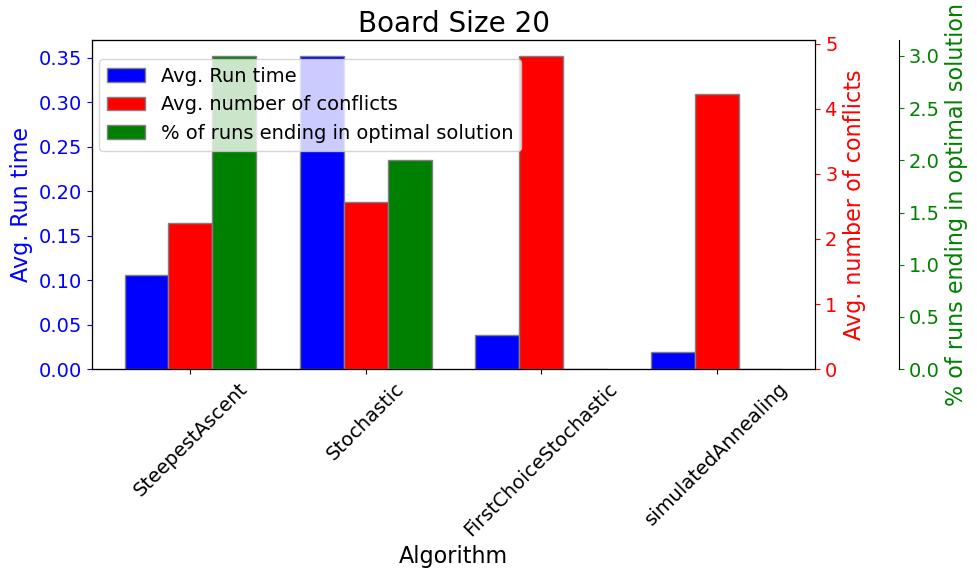

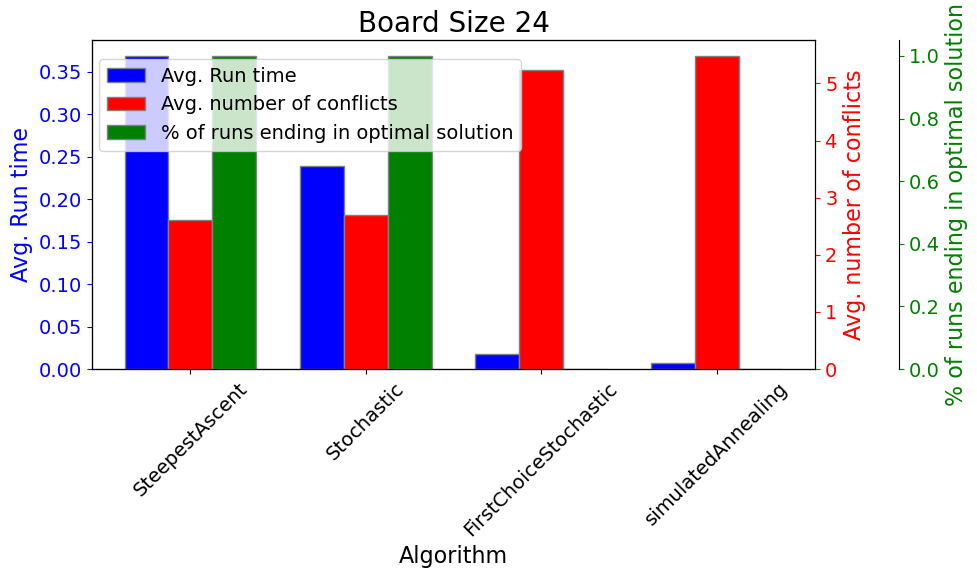

In [170]:
#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# make two different charts, one for 4 and one for 8
df_4 = df[df['Board size'] == 4]
df_8 = df[df['Board size'] == 8]
df_12 = df[df['Board size'] == 12]
df_16 = df[df['Board size'] == 16]
df_20 = df[df['Board size'] == 20]
df_24 = df[df['Board size'] == 24]

# list them so we can write a for loop instead of copy pasting
dfs = [(df_4, 4), (df_8, 8),(df_12, 12), (df_16, 16),(df_20, 20),(df_24, 24)]
barWidth = 0.25
for df, size in dfs:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    r1 = np.arange(len(df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    ax1.bar(r1, df['Avg. Run time'], color='b', width=barWidth, edgecolor='grey', label='Avg. Run time')
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Avg. Run time', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.bar(r2, df['Avg. number of conflicts'], color='r', width=barWidth, edgecolor='grey', label='Avg. number of conflicts')
    ax2.set_ylabel('Avg. number of conflicts', color='r')
    ax2.tick_params('y', colors='r')

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.bar(r3, df['% of runs ending in optimal solution'], color='g', width=barWidth, edgecolor='grey', label='% of runs ending in optimal solution')
    ax3.set_ylabel('% of runs ending in optimal solution', color='g')
    ax3.tick_params('y', colors='g')

    ax1.set_xticks([r + barWidth for r in range(len(df))])
    ax1.set_xticklabels(df['Algorithm'])

    for label in ax1.get_xticklabels():
        label.set_rotation(45)

    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.title(f'Board Size {size}')
    plt.tight_layout()
    plt.show()

In [171]:
for board_size in [50,75,100]:
    print(f"Board Size: {board_size}")
    for solver in [SteepestAscent, Stochastic]:
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 1)
        print(f"Solver: {solver.__name__}")
        print(f"Average Runtime: {avg_runtime}")
        print(f"Average Conflicts: {avg_conflicts}")
        print(f"Percentage of Optimal Solutions: {percent_optimal_solutions}")
    print("\n")

Board Size: 50
Solver: SteepestAscent
Average Runtime: 3.7759947776794434
Average Conflicts: 4.0
Percentage of Optimal Solutions: 0.0
Solver: Stochastic
Average Runtime: 6.400014400482178
Average Conflicts: 4.0
Percentage of Optimal Solutions: 0.0


Board Size: 75
Solver: SteepestAscent
Average Runtime: 13.837132692337036
Average Conflicts: 2.0
Percentage of Optimal Solutions: 0.0
Solver: Stochastic
Average Runtime: 28.29419994354248
Average Conflicts: 4.0
Percentage of Optimal Solutions: 0.0


Board Size: 100
Solver: SteepestAscent
Average Runtime: 46.95799660682678
Average Conflicts: 2.0
Percentage of Optimal Solutions: 0.0
Solver: Stochastic
Average Runtime: 84.47002410888672
Average Conflicts: 4.0
Percentage of Optimal Solutions: 0.0




In [172]:
for board_size in [250,500,750]:
    print(f"Board Size: {board_size}")
    for solver in [FirstChoiceStochastic]:
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 1)
        print(f"Solver: {solver.__name__}")
        print(f"Average Runtime: {avg_runtime}")
        print(f"Average Conflicts: {avg_conflicts}")
        print(f"Percentage of Optimal Solutions: {percent_optimal_solutions}")
    print("\n")

Board Size: 250
Solver: FirstChoiceStochastic
Average Runtime: 6.237812042236328
Average Conflicts: 33.0
Percentage of Optimal Solutions: 0.0


Board Size: 500
Solver: FirstChoiceStochastic
Average Runtime: 40.104886293411255
Average Conflicts: 49.0
Percentage of Optimal Solutions: 0.0


Board Size: 750
Solver: FirstChoiceStochastic
Average Runtime: 81.86220526695251
Average Conflicts: 84.0
Percentage of Optimal Solutions: 0.0




In [173]:
for board_size in [2000,2500,3000,3500,4000]:
    print(f"Board Size: {board_size}")
    for solver in [simulatedAnnealing]:
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 1)
        print(f"Solver: {solver.__name__}")
        print(f"Average Runtime: {avg_runtime}")
        print(f"Average Conflicts: {avg_conflicts}")
        print(f"Percentage of Optimal Solutions: {percent_optimal_solutions}")
    print("\n")

Board Size: 2000
Solver: simulatedAnnealing
Average Runtime: 11.748090982437134
Average Conflicts: 951.0
Percentage of Optimal Solutions: 0.0


Board Size: 2500
Solver: simulatedAnnealing
Average Runtime: 24.264819383621216
Average Conflicts: 979.0
Percentage of Optimal Solutions: 0.0


Board Size: 3000
Solver: simulatedAnnealing
Average Runtime: 27.77323031425476
Average Conflicts: 1300.0
Percentage of Optimal Solutions: 0.0


Board Size: 3500
Solver: simulatedAnnealing
Average Runtime: 28.33680486679077
Average Conflicts: 1701.0
Percentage of Optimal Solutions: 0.0


Board Size: 4000
Solver: simulatedAnnealing
Average Runtime: 40.59770202636719
Average Conflicts: 1964.0
Percentage of Optimal Solutions: 0.0




Based on the above data, you will see that Steepest ascent takes above 45 seconds on a board size of 100, and Stochastic 1 takes over 80 seconds on a board size of 100. This is much sooner than the next two methods. First choice stochastic can increase its board size to between 500 and 750 before it hits a minute, with a board size of 750 taking 81 seconds. Simulated annealing, however, can have a much, much larger board size, reaching a time of 40 seconds on a board size of 4000.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

[1 2 0 1]
[0 2 0 1]
Board with 2 conflicts.


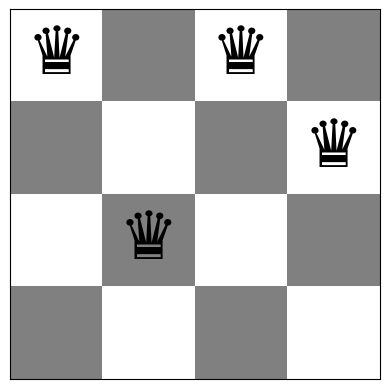

In [174]:
# Code and description go here
def localMoveOneSquare(row,size):
    if(row == 0):
        row = 1
    elif(row == size-1):
        row = size-2
    else:
        row = row + random.choice([1,-1])
    return row
def oneQueenOneSquareSHC(board):
    size = len(board)
    currentConflicts = conflicts(board)
    col = random.randint(0,size-1) #random queen
    row = localMoveOneSquare(board[col],size)
    if row != board[col]: #make sure queen is not in new row already
        newBoard = board.copy()
        newBoard[col] = row #move the queen
        newConflicts = conflicts(newBoard)
        if(newConflicts < currentConflicts): #if this move is better, return
            return newBoard, newConflicts
    return board, currentConflicts #if no improvement, return the current board

board = random_board(4)
show_board(solve(board,oneQueenOneSquareSHC,100,verbose=True))     


[2 1 1 3]
[2 1 3 1]
Board with 2 conflicts.


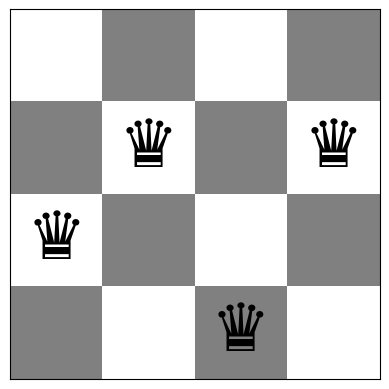

In [175]:
def switchQueens(board):
    size = len(board)
    currentConflicts = conflicts(board)
    col1 = random.randint(0,size-1) #random queen
    col2 = random.randint(0,size-1) #random queen
    while(col2 == col1):
        col2 = random.randint(0,size-1) #random queen
    newBoard = board.copy()
    col1Row = board[col1]
    newBoard[col1] = board[col2] #move the queen
    newBoard[col2] = col1Row
    newConflicts = conflicts(newBoard)
    if(newConflicts < currentConflicts): #if this move is better, return
        return newBoard, newConflicts
    return board, currentConflicts #if no improvement, return the current board

board = random_board(4)
show_board(solve(board,switchQueens,100,verbose=True))     


[1 3 3 3]
[2 3 1 3]
[2 0 1 3]
[2 0 3 1]
Board with 0 conflicts.


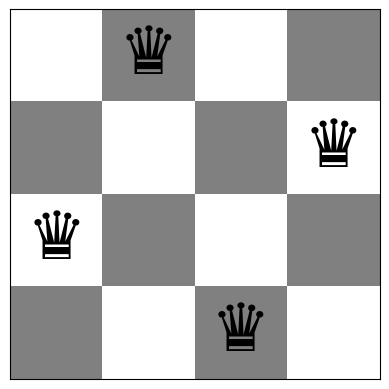

In [176]:
def moveTwoQueens(board):
    size = len(board)
    currentConflicts = conflicts(board)
    col1, col2 = random.sample(range(size), 2)  # two random queens
    row1, row2 = random.randint(0, size-1), random.randint(0, size-1)  # new positions
    newBoard = board.copy()
    newBoard[col1], newBoard[col2] = row1, row2
    newConflicts = conflicts(newBoard)
    if newConflicts < currentConflicts:  # if this move is better, return
        return newBoard, newConflicts
    return board, currentConflicts  # if no improvement, return the current board
board = random_board(4)
show_board(solve(board,moveTwoQueens,100,verbose=True))   

[2 2 3 2]
[2 1 1 2]
[2 1 1 0]
[2 0 3 0]
[2 0 3 1]
Board with 0 conflicts.


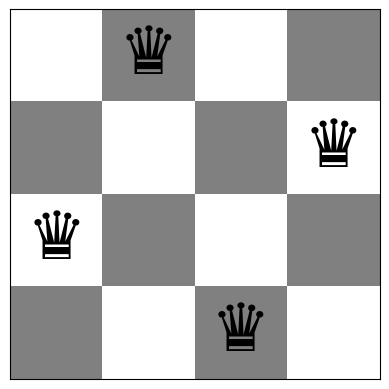

[3 1 0 3]
[3 2 0 2]
[3 3 0 2]
[1 3 0 2]
Board with 0 conflicts.


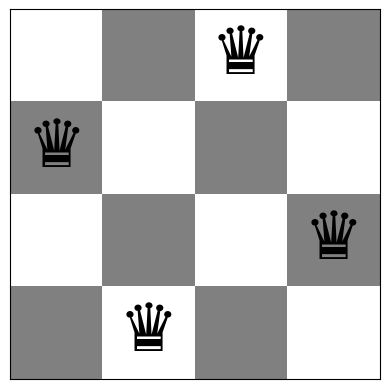

[1 0 3 0]
[0 0 3 1]
[2 0 3 1]
Board with 0 conflicts.


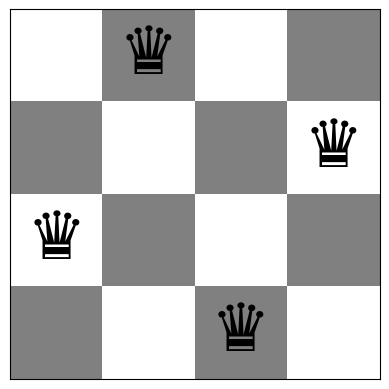

[2 0 0 1]
[3 0 0 1]
[3 0 2 1]
[2 0 3 1]
Board with 0 conflicts.


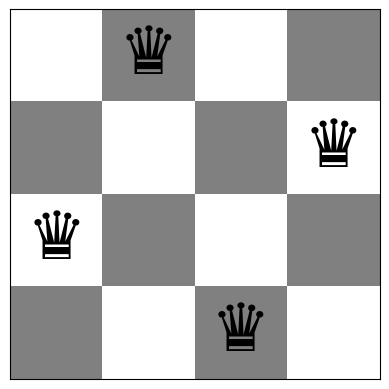

In [177]:
import time
def mixedMovesAll(board):
    move = random.choice([oneQueenOneSquareSHC, switchQueens, moveTwoQueens,FirstChoiceStochastic])
    return move(board)
board = random_board(4)
show_board(solve(board,mixedMovesAll,100,verbose=True))


def mixedMovesOneTwo(board):
    move = random.choice([moveTwoQueens,FirstChoiceStochastic])
    return move(board)
board = random_board(4)
show_board(solve(board,mixedMovesOneTwo,100,verbose=True)) 


def mixedMovesSwitchOne(board):
    move = random.choice([switchQueens,FirstChoiceStochastic])
    return move(board)
board = random_board(4)
show_board(solve(board,mixedMovesSwitchOne,100,verbose=True))


def mixedMovesSwitchTwoOne(board):
    move = random.choice([oneQueenOneSquareSHC, switchQueens, moveTwoQueens,FirstChoiceStochastic])
    return move(board)
board = random_board(4)
show_board(solve(board,mixedMovesSwitchTwoOne,100,verbose=True))




In [178]:
df = pd.DataFrame(columns=["Algorithm", "Board size", "Avg. Run time", "Avg. number of conflicts", "% of runs ending in optimal solution"])
for board_size in [4,8]:
    for solver in [oneQueenOneSquareSHC, switchQueens, moveTwoQueens, mixedMovesSwitchTwoOne,mixedMovesOneTwo,mixedMovesSwitchOne,mixedMovesAll]:
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 100)
        new_df = pd.DataFrame({
            "Algorithm": [solver.__name__],
            "Board size": [board_size],
            "Avg. Run time": [avg_runtime],
            "Avg. number of conflicts": [avg_conflicts],
            "% of runs ending in optimal solution": [percent_optimal_solutions]
        })
        df = pd.concat([df,new_df],ignore_index=True)

print(df.to_markdown(index=False))

| Algorithm              |   Board size |   Avg. Run time |   Avg. number of conflicts |   % of runs ending in optimal solution |
|:-----------------------|-------------:|----------------:|---------------------------:|---------------------------------------:|
| oneQueenOneSquareSHC   |            4 |      0.00231202 |                       1.83 |                                      3 |
| switchQueens           |            4 |      0.00167797 |                       1.99 |                                     15 |
| moveTwoQueens          |            4 |      0.00239076 |                       0.21 |                                     79 |
| mixedMovesSwitchTwoOne |            4 |      0.00213536 |                       0.03 |                                     98 |
| mixedMovesOneTwo       |            4 |      0.00219441 |                       0.41 |                                     61 |
| mixedMovesSwitchOne    |            4 |      0.00204957 |                       0.1  |  

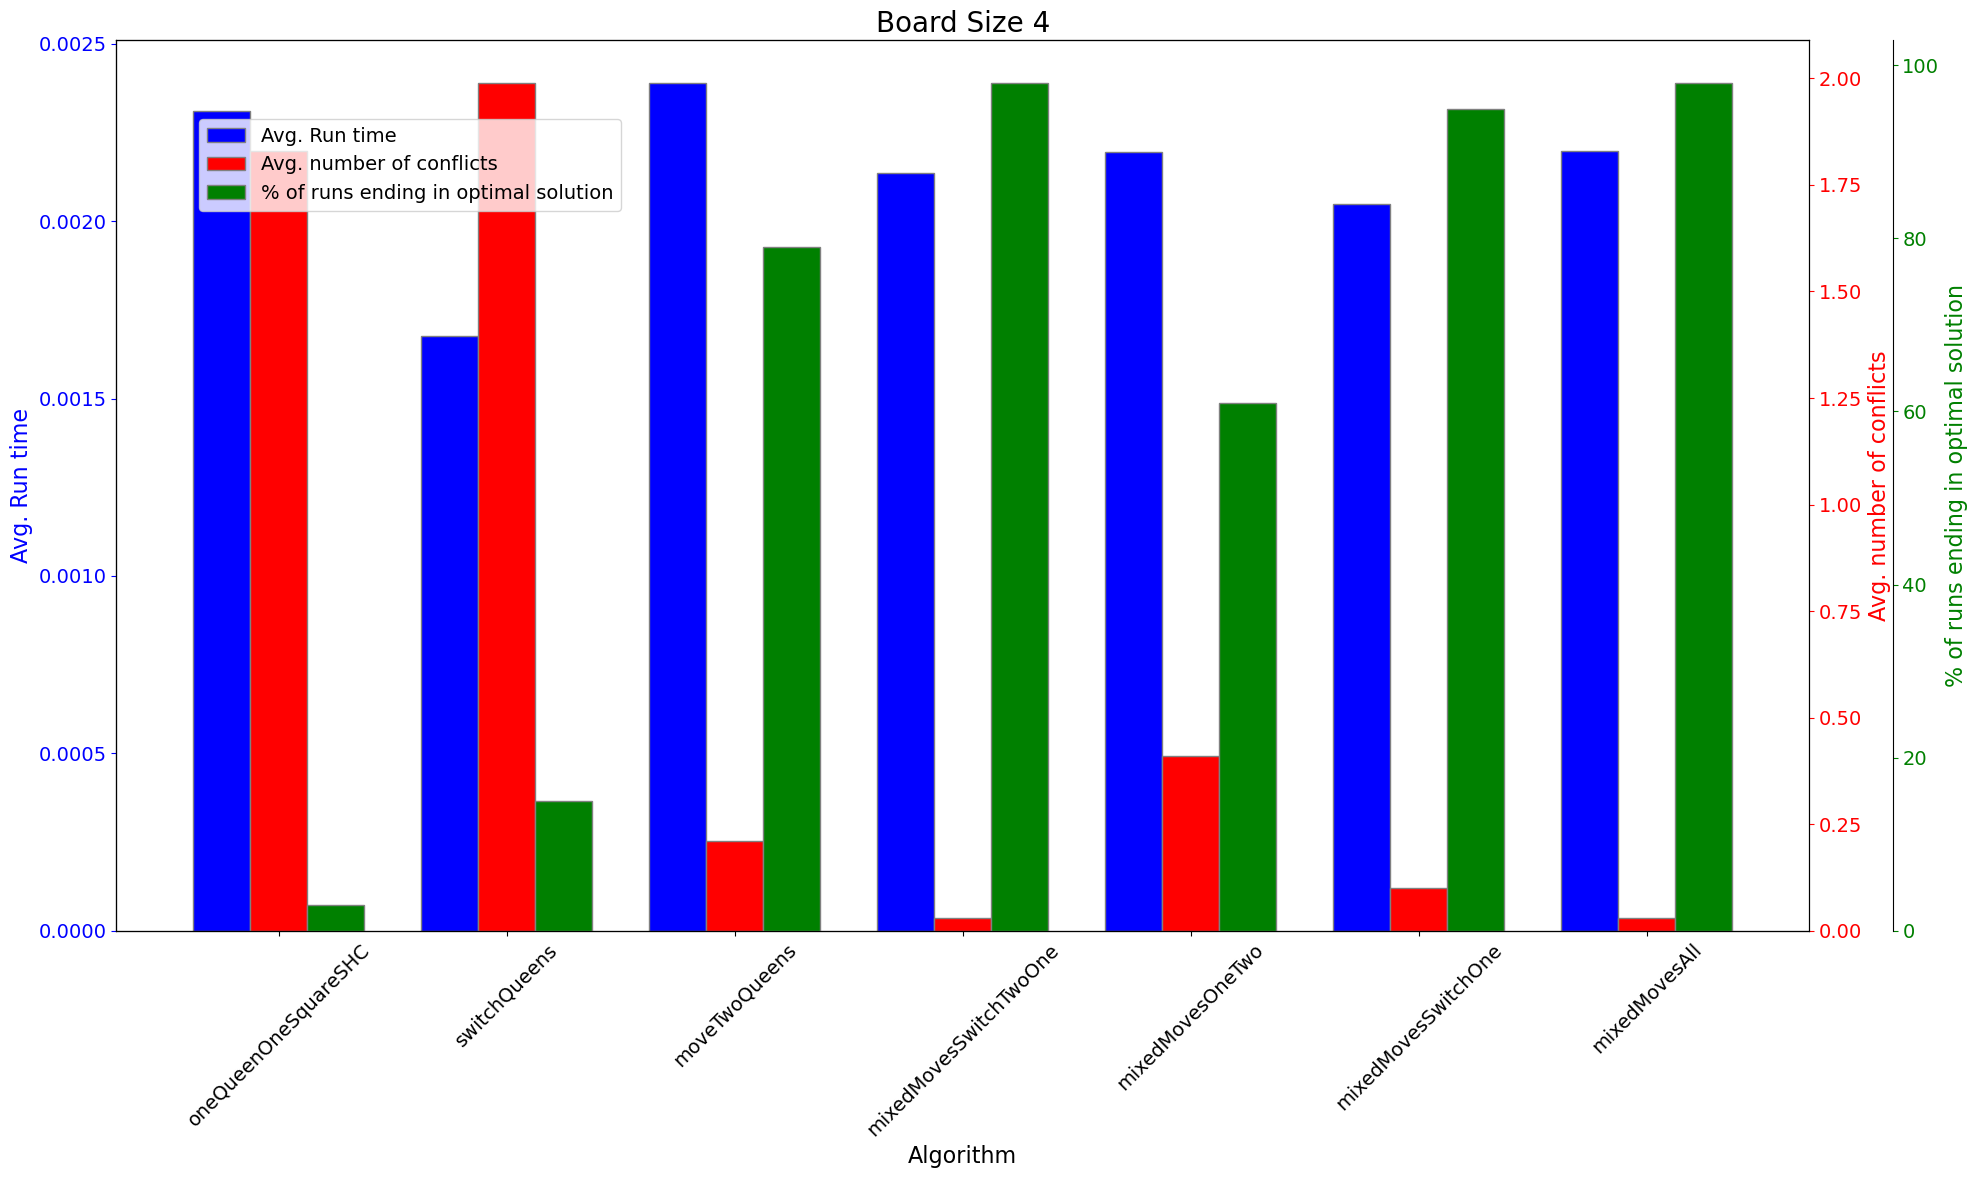

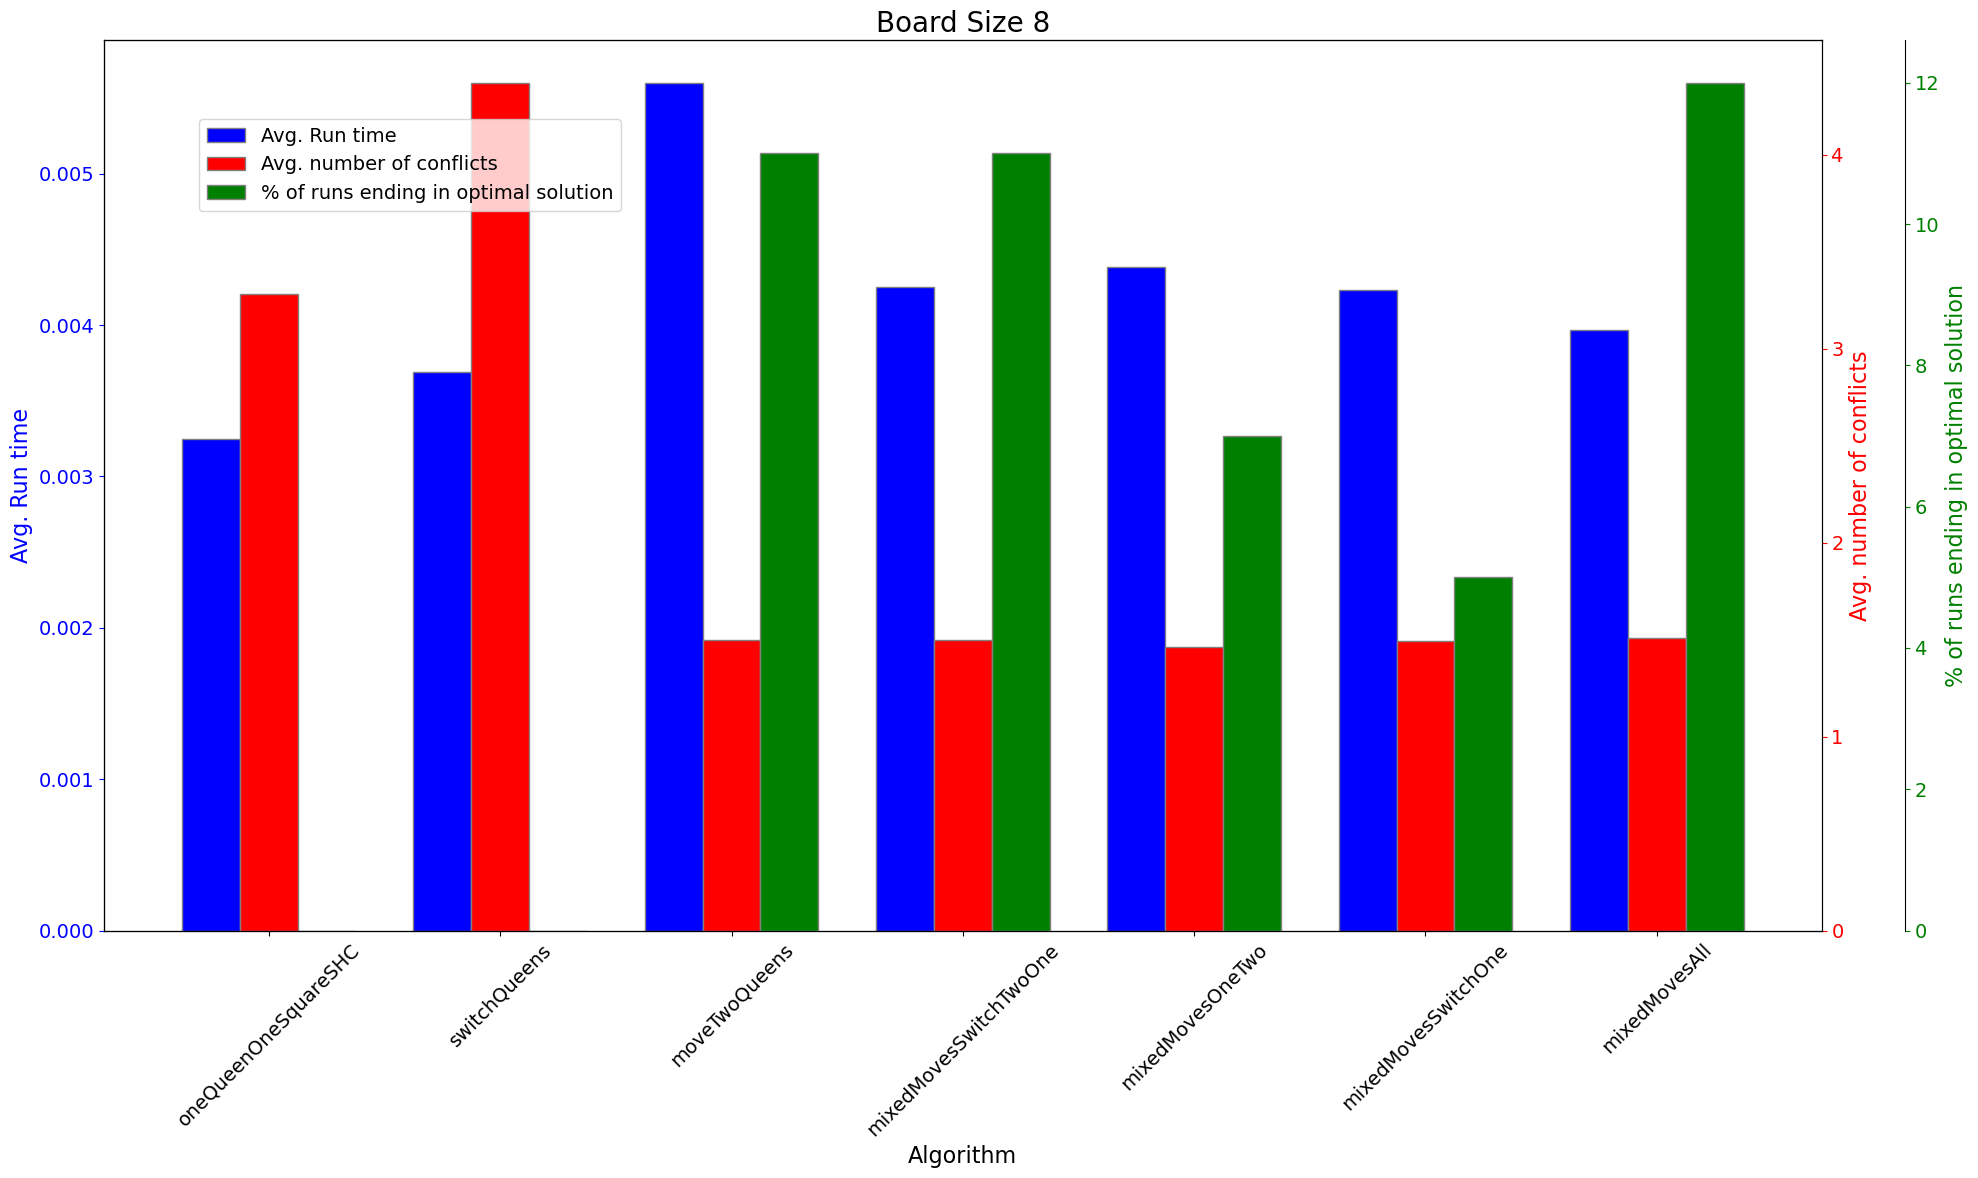

In [179]:
#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# make two different charts, one for 4 and one for 8
df_4 = df[df['Board size'] == 4]
df_8 = df[df['Board size'] == 8]

# list them so we can write a for loop instead of copy pasting
dfs = [(df_4, 4), (df_8, 8)]
barWidth = .25
for df, size in dfs:
    fig, ax1 = plt.subplots(figsize=(20, 12))

    r1 = np.arange(len(df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    ax1.bar(r1, df['Avg. Run time'], color='b', width=barWidth, edgecolor='grey', label='Avg. Run time')
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Avg. Run time', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.bar(r2, df['Avg. number of conflicts'], color='r', width=barWidth, edgecolor='grey', label='Avg. number of conflicts')
    ax2.set_ylabel('Avg. number of conflicts', color='r')
    ax2.tick_params('y', colors='r')

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.bar(r3, df['% of runs ending in optimal solution'], color='g', width=barWidth, edgecolor='grey', label='% of runs ending in optimal solution')
    ax3.set_ylabel('% of runs ending in optimal solution', color='g')
    ax3.tick_params('y', colors='g')

    ax1.set_xticks([r + barWidth for r in range(len(df))])
    ax1.set_xticklabels(df['Algorithm'])

    for label in ax1.get_xticklabels():
        label.set_rotation(45)

    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.title(f'Board Size {size}')
    plt.tight_layout()
    plt.show()

# Describe what you find out about how well these moves and combinations of these moves work.

According to my tests, it appears that oneQueenOneSquare and switching queens are very bad for large board sizes as seen above. Moving two queens is better, and a mixed move set is better than all of them. This could be because when only switching two columns, if two queens started in the same row, the program will never finish. It needs all queens to start in different rows. For moving queens one square, if a queen is stuck between two other queens, it will never make it out of its trapped spot unless the other queens move also. This makes it very inefficient, and almost never finishes. Moving two queens isn't bad, but the issue comes as it gets closer to the end where it only needs to move one queen, but struggles to find that because it is unlikely to find a move that doesn't move one of the queens. The mixed move function does better, but faces the same issue where it needs to only move one queen towards the end of the search, which is unlikely with 5 possible types of moves.
When looking at other combinations of these new move types with also just moving one queen, mixed moves all did the best on the n=8 size, doing slightly better than just first choice stochastic.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [180]:
# Code and description go here